<a href="https://colab.research.google.com/github/xerox010/Fraud-Detection/blob/main/Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the Dependencies

In [160]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split,StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
import xgboost as xgb

Mounting the drive

In [161]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [162]:
# loading the dataset to a Pandas DataFrame
credit_card_data = pd.read_csv('/content/drive/MyDrive/Machine Learning/Project 1:Credit card Fraud /creditcard.csv')

In [163]:
# first 5 rows of the dataset
credit_card_data.head().style.background_gradient(cmap='Purples')

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.000000,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.620000,0
1,0.000000,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.690000,0
2,1.000000,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.660000,0
3,1.000000,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.500000,0
4,2.000000,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.990000,0


In [164]:
credit_card_data.tail().style.background_gradient(cmap='Purples')

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.000000,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.770000,0
284803,172787.000000,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.790000,0
284804,172788.000000,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.880000,0
284805,172788.000000,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.000000,0
284806,172792.000000,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,-0.915427,-1.040458,-0.031513,-0.188093,-0.084316,0.041333,-0.302620,-0.660377,0.167430,-0.256117,0.382948,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.000000,0


In [165]:
# dataset informations
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

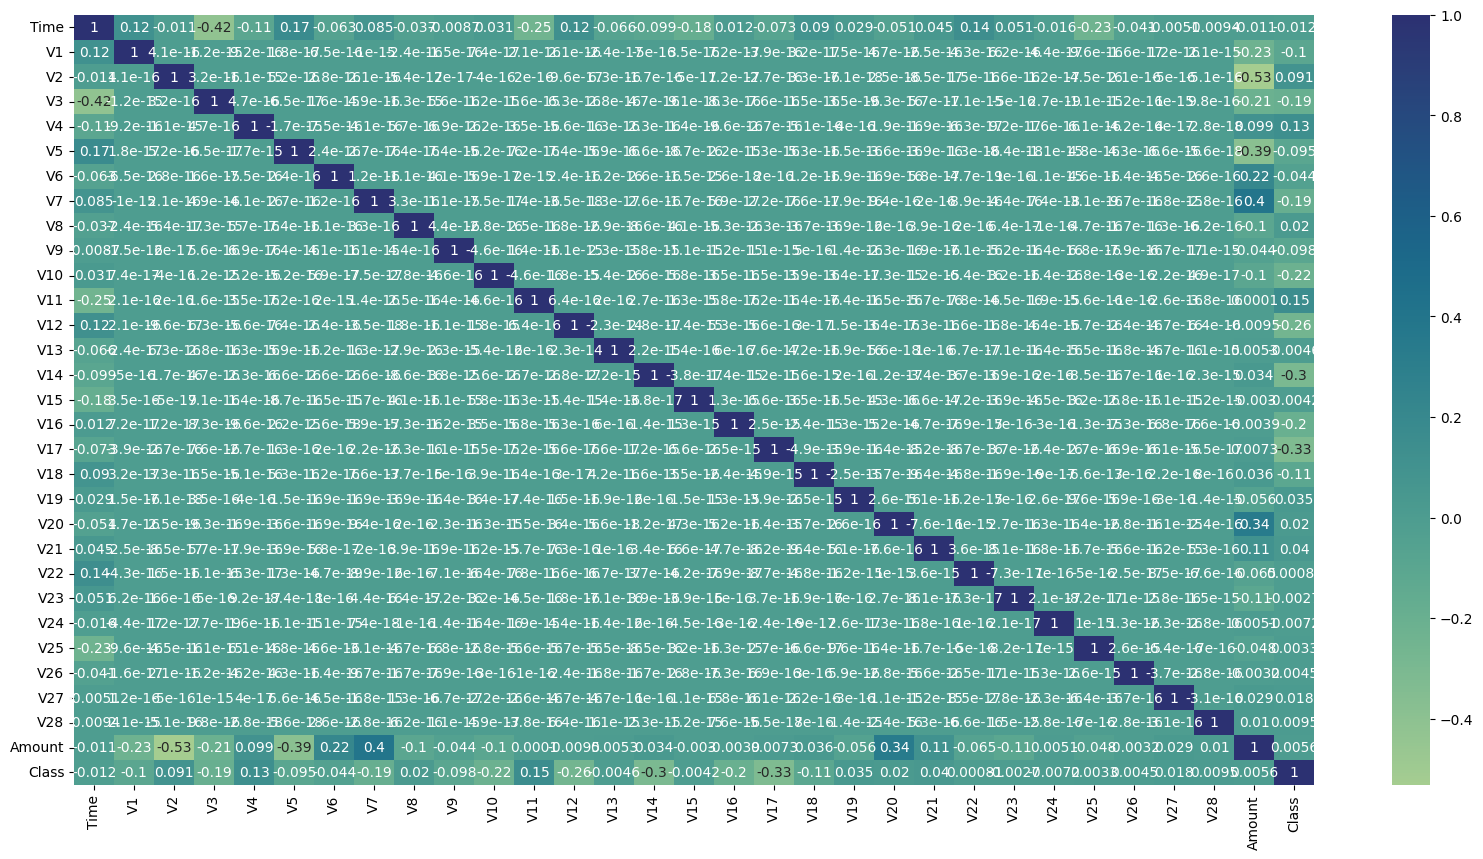

In [166]:
paper = plt.figure(figsize=[20,10])
sns.heatmap(credit_card_data.corr(),cmap='crest',annot=True)
plt.show()

In [167]:
# checking the number of missing values in each column
credit_card_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [168]:
# distribution of legit transactions & fraudulent transactions
credit_card_data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

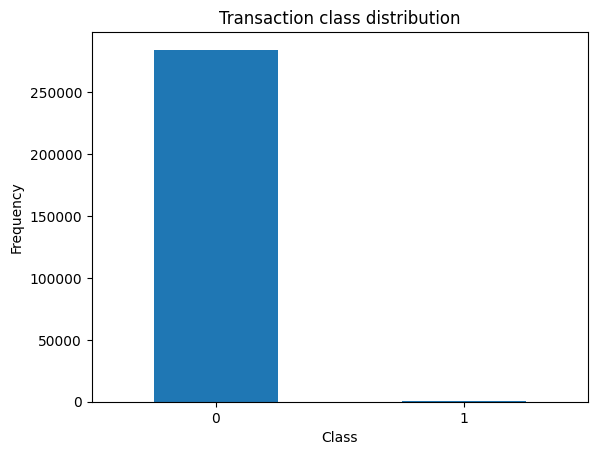

In [169]:
count_classes = pd.value_counts(credit_card_data['Class'], sort=True)
count_classes.plot(kind = 'bar', rot = 0)
plt.title("Transaction class distribution")
plt.xticks(range(2))
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.show()

Create Histogram with Density Curve Using Seaborn

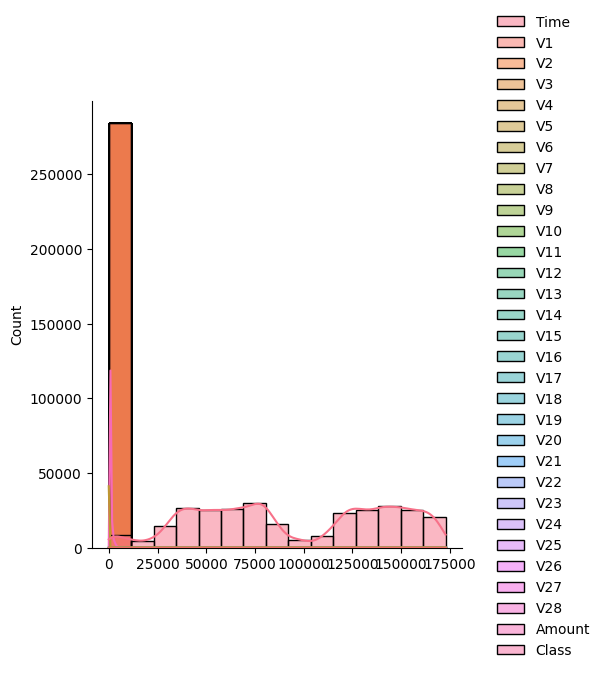

In [170]:
sns.displot(credit_card_data, kde=True, bins=15)

This Dataset is highly unblanced

0 --> Normal Transaction

1 --> fraudulent transaction

In [171]:
# separating the data for analysis
legit = credit_card_data[credit_card_data.Class == 0]
fraud = credit_card_data[credit_card_data.Class == 1]

In [172]:
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [173]:
# statistical measures of the data
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [174]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [175]:
# compare the values for both transactions
credit_card_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


Under-Sampling

Build a sample dataset containing similar distribution of normal transactions and Fraudulent Transactions

Number of Fraudulent Transactions --> 492

In [176]:
legit_sample = legit.sample(n=1000)

Concatenating two DataFrames

In [177]:
new_dataset = pd.concat([legit_sample, fraud], axis=0)

In [178]:
new_dataset.head().style.background_gradient(cmap='Purples')

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
140819,83963.000000,0.663813,-1.532475,-0.509179,0.438394,-0.667576,0.104687,0.125464,-0.167110,-0.827623,0.636039,-1.953379,-0.872658,-0.020153,0.304931,1.116841,-0.810348,-0.688071,1.795395,-0.729025,0.275191,-0.291855,-1.286780,-0.437484,-1.068592,0.414627,-0.416653,-0.031661,0.085941,405.950000,0
168885,119429.000000,-1.761247,-0.385203,0.823440,-1.092194,1.591817,-0.869058,0.106289,-0.820862,-0.169001,-0.738472,0.310761,1.082777,0.592006,0.021751,-1.513697,0.825323,-1.310363,0.145465,-0.931475,-0.564962,0.756431,-0.116932,-0.319058,-0.350021,-0.012824,0.043115,0.315260,0.039061,84.900000,0
78311,57472.000000,-0.055899,-1.852999,-2.305794,0.784192,1.719488,3.461026,0.487505,0.642195,-0.255671,-0.722904,0.237505,-0.168285,0.073904,-0.653032,1.402931,1.062732,-0.011453,0.955305,-0.460306,1.421738,0.220612,-1.048022,-0.659956,0.907380,0.410218,-0.505850,-0.089272,0.167501,691.510000,0
156500,108243.000000,-0.992601,1.803080,-1.117239,-0.622613,0.667005,-0.296515,0.120051,0.796717,0.803559,-1.299137,1.208522,-2.065446,1.132898,1.338785,-1.727332,0.731867,1.103797,0.756701,-0.058960,-0.295310,-0.262946,-0.765728,0.220929,0.043553,-1.027629,-0.032442,-0.138517,0.168379,1.780000,0
35409,38108.000000,1.143752,-0.104033,0.338788,-0.157450,-0.408430,-0.460512,-0.086006,-0.032612,-0.148459,-0.090062,1.974178,1.423442,0.718307,0.330548,0.548750,0.003469,-0.226680,-0.498924,-0.137675,0.014870,0.135487,0.399568,-0.040645,0.343041,0.262972,1.096012,-0.074614,-0.004443,33.990000,0


In [179]:
new_dataset.tail().style.background_gradient(cmap='Purples')

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.000000,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,-5.587794,2.115795,-5.417424,-1.235123,-6.665177,0.401701,-2.897825,-4.570529,-1.315147,0.391167,1.252967,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.000000,1
280143,169347.000000,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,-3.232153,2.858466,-3.096915,-0.792532,-5.210141,-0.613803,-2.155297,-3.267116,-0.688505,0.737657,0.226138,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.760000,1
280149,169351.000000,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,-3.463891,1.794969,-2.775022,-0.418950,-4.057162,-0.712616,-1.603015,-5.035326,-0.507000,0.266272,0.247968,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.890000,1
281144,169966.000000,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,-5.245984,1.933520,-5.030465,-1.127455,-6.416628,0.141237,-2.549498,-4.614717,-1.478138,-0.035480,0.306271,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.000000,1
281674,170348.000000,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,-0.888722,0.491140,0.728903,0.380428,-1.948883,-0.832498,0.519436,0.903562,1.197315,0.593509,-0.017652,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.530000,1


In [180]:
new_dataset['Class'].value_counts()

0    1000
1     492
Name: Class, dtype: int64

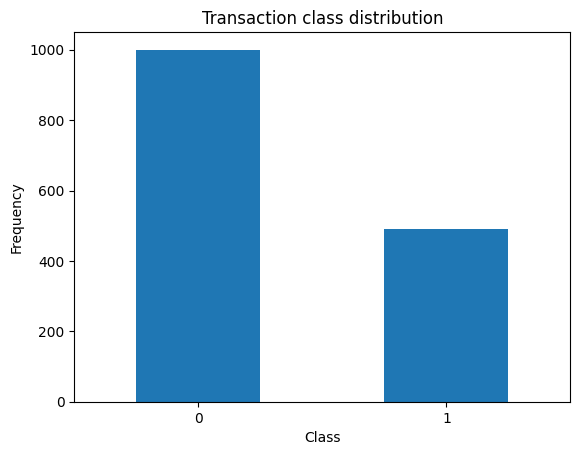

In [181]:
count_classes = pd.value_counts(new_dataset['Class'], sort=True)
count_classes.plot(kind = 'bar', rot = 0)
plt.title("Transaction class distribution")
plt.xticks(range(2))
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.show()

Create Histogram with Density Curve Using Seaborn

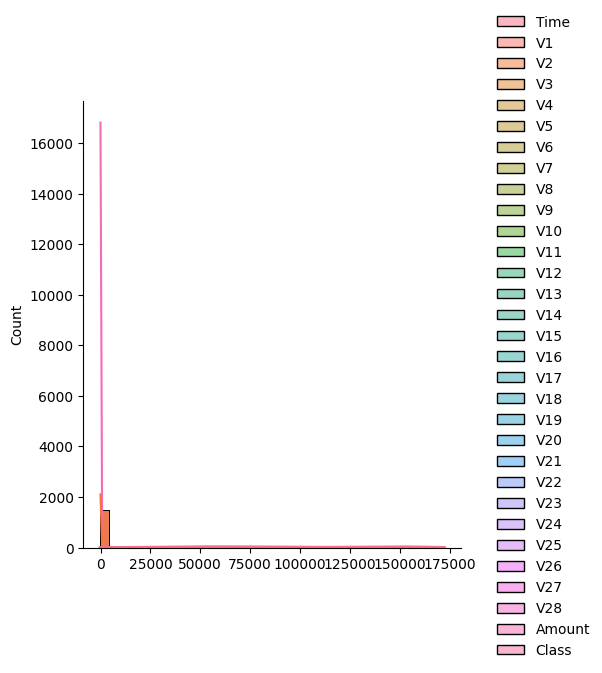

In [182]:
sns.displot(new_dataset , kde=True, bins=40)

In [183]:
new_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1492 entries, 140819 to 281674
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    1492 non-null   float64
 1   V1      1492 non-null   float64
 2   V2      1492 non-null   float64
 3   V3      1492 non-null   float64
 4   V4      1492 non-null   float64
 5   V5      1492 non-null   float64
 6   V6      1492 non-null   float64
 7   V7      1492 non-null   float64
 8   V8      1492 non-null   float64
 9   V9      1492 non-null   float64
 10  V10     1492 non-null   float64
 11  V11     1492 non-null   float64
 12  V12     1492 non-null   float64
 13  V13     1492 non-null   float64
 14  V14     1492 non-null   float64
 15  V15     1492 non-null   float64
 16  V16     1492 non-null   float64
 17  V17     1492 non-null   float64
 18  V18     1492 non-null   float64
 19  V19     1492 non-null   float64
 20  V20     1492 non-null   float64
 21  V21     1492 non-null   float6

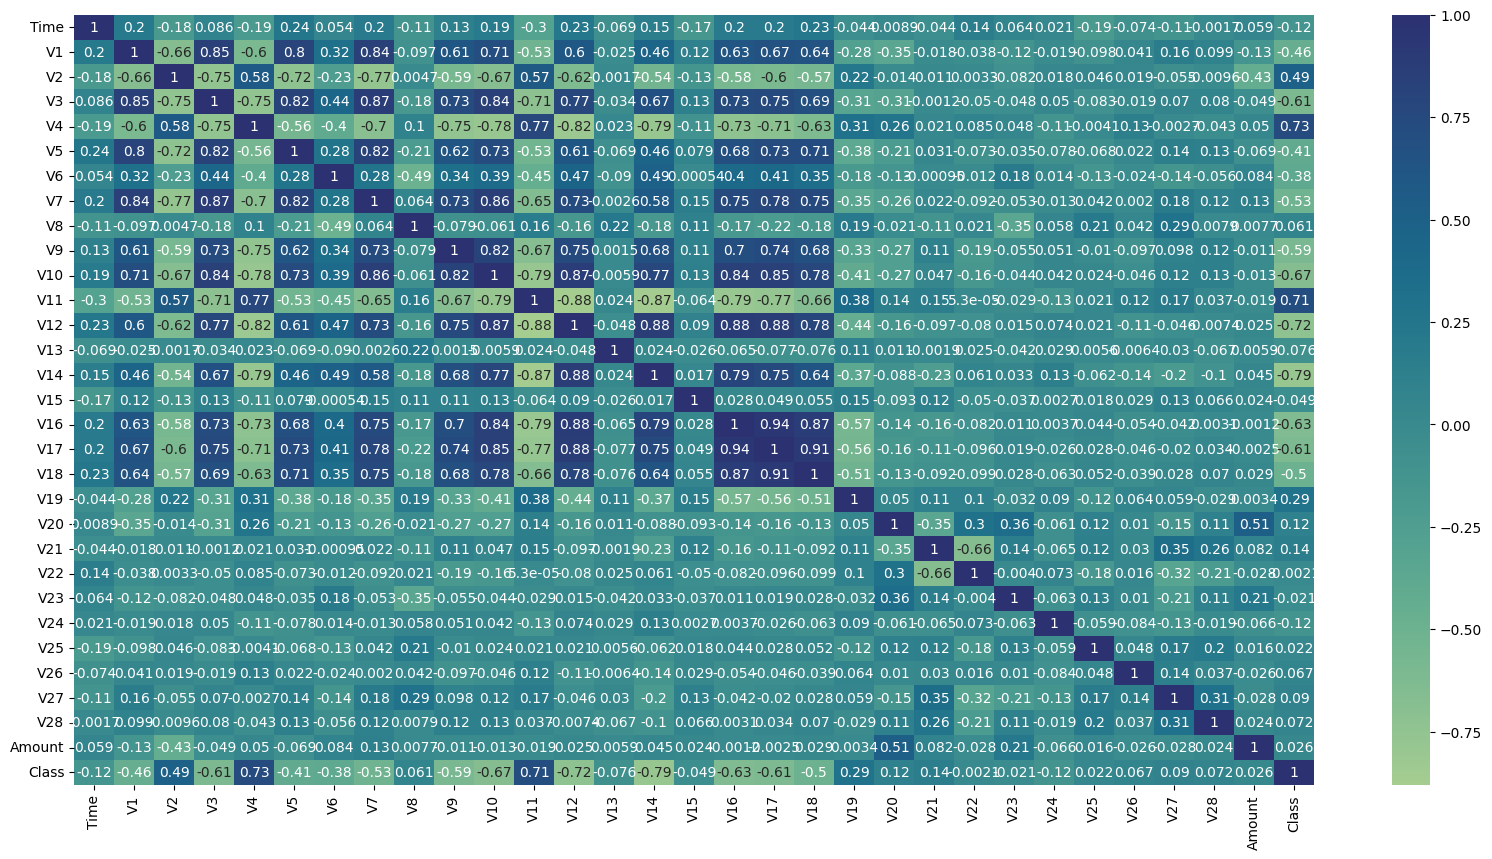

In [184]:
paper = plt.figure(figsize=[20,10])
sns.heatmap(new_dataset.corr(),cmap='crest',annot=True)
plt.show()

In [185]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,93615.365000,-0.059918,-0.023756,-0.024520,-0.031804,-0.057144,-0.067616,0.021930,0.056182,0.080502,...,0.089276,0.020946,0.018695,0.010311,0.037926,0.012787,-0.018013,0.005405,0.014274,104.735190
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


Splitting the data into Features & Targets

In [186]:
X = new_dataset.drop(columns='Class', axis=1)
Y = new_dataset['Class']

In [187]:
print(X)

            Time        V1        V2        V3        V4        V5        V6  \
140819   83963.0  0.663813 -1.532475 -0.509179  0.438394 -0.667576  0.104687   
168885  119429.0 -1.761247 -0.385203  0.823440 -1.092194  1.591817 -0.869058   
78311    57472.0 -0.055899 -1.852999 -2.305794  0.784192  1.719488  3.461026   
156500  108243.0 -0.992601  1.803080 -1.117239 -0.622613  0.667005 -0.296515   
35409    38108.0  1.143752 -0.104033  0.338788 -0.157450 -0.408430 -0.460512   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

In [188]:
print(Y)

140819    0
168885    0
78311     0
156500    0
35409     0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 1492, dtype: int64


Split the data into Training data & Testing Data with Train_Test_split

In [189]:
#X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

Split the data into Training data & Testing Data with K-fold

In [190]:
k_fold = StratifiedKFold(n_splits=10, shuffle=True, random_state=2)

In [191]:
# Iterate over the folds
for train_index, test_index in k_fold.split(X, Y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]

In [192]:
print(X.shape, X_train.shape, X_test.shape)

(1492, 30) (1343, 30) (149, 30)


Model Training

Logistic Regression,Random Forest, Dicision Tree, GB, xgbrf,Adaboost

In [293]:
models={
    "Logistic Regression" :LogisticRegression(max_iter=200),
    "Random Forest" :RandomForestClassifier(),
    "Gradient Boost" :GradientBoostingClassifier(),
    #"Decision Tree" :DecisionTreeClassifier(),
    #"XGCLF" : xgb.XGBRFClassifier(),
    #"Adaboost" : AdaBoostClassifier()
}

In [290]:
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, Y_train)

    # model Prediction
    X_train_prediction = model.predict(X_train)
    X_test_prediction = model.predict(X_test)

    # accuracy on training data

    training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
    #conf_matrix = confusion_matrix(X_train_prediction, Y_train)
    #clas_rep = classification_report(X_train_prediction, Y_train)

    # accuracy on test data

    test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
    conf_matrix = confusion_matrix(X_test_prediction, Y_test)
    clas_rep = classification_report(X_test_prediction, Y_test)

    print(list(models.keys())[i])
    print('------------------------------------------------')

    print('Accuracy on Training data : {:.2f}'.format(training_data_accuracy))

    print('Accuracy score on Test Data : {:.2f}'.format(test_data_accuracy))
    print('------------------------------------------------')
    #print('\n')
    #print(conf_matrix,'\n')
    print(clas_rep)
    print('\n')

Logistic Regression
------------------------------------------------
Accuracy on Training data : 0.95
Accuracy score on Test Data : 0.96
------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       102
           1       0.92      0.96      0.94        47

    accuracy                           0.96       149
   macro avg       0.95      0.96      0.95       149
weighted avg       0.96      0.96      0.96       149



Random Forest
------------------------------------------------
Accuracy on Training data : 1.00
Accuracy score on Test Data : 0.95
------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      0.94      0.97       105
           1       0.88      0.98      0.92        44

    accuracy                           0.95       149
   macro avg       0.93      0.96      0.95       149
weighted avg       0.96      0.95

Displaying the ROC curve, Precision-Recall curve, and Confusion Matrix

In [291]:
from sklearn.metrics import precision_recall_curve,roc_curve, auc

Logistic Regression


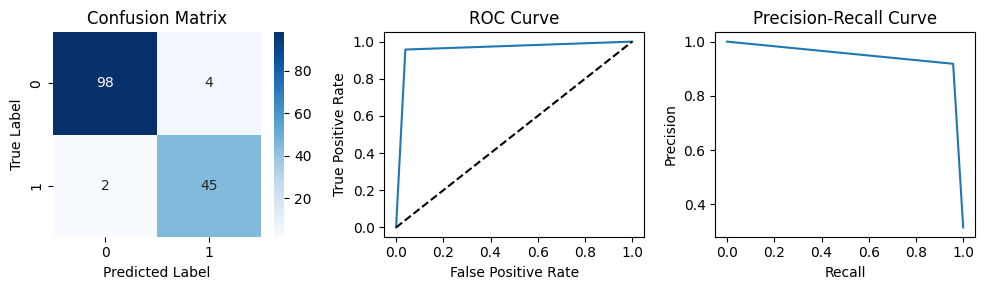

Random Forest


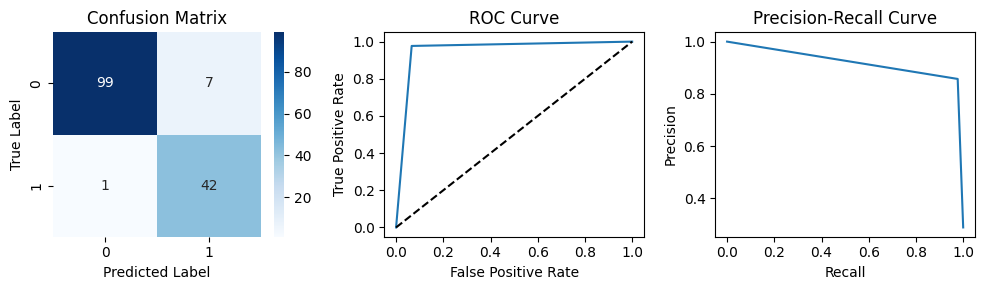

Gradient Boost


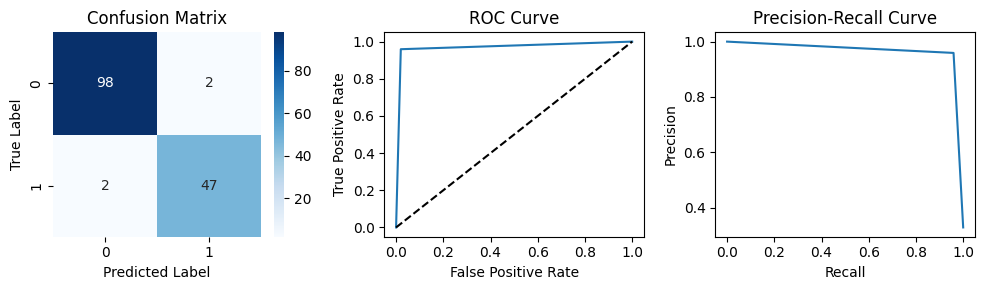

In [292]:
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, Y_train)

    X_train_prediction = model.predict(X_train)
    X_test_prediction = model.predict(X_test)

    # Create confusion matrix
    conf_matrix = confusion_matrix(X_test_prediction, Y_test)
    # Compute ROC curve and AUC
    fpr, tpr, thresholds_roc = roc_curve(X_test_prediction, Y_test)
    roc_auc = auc(fpr, tpr)
    # Compute precision-recall pairs for different probability thresholds
    precision, recall, thresholds_pr = precision_recall_curve(X_test_prediction, Y_test)

    print(list(models.keys())[i])

    # Plot Confusion Matrix
    plt.figure(figsize=(10, 3))
    plt.subplot(1, 3, 1)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    #plt.legend()

    # Plot ROC curve
    plt.subplot(1, 3, 2)
    plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--', label='Random')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    #Receiver Operating Characteristic (ROC)
    plt.title('ROC Curve')
    #plt.legend()

    # Plot Precision-Recall curve
    plt.subplot(1, 3, 3)
    plt.plot(recall, precision, label='Precision-Recall Curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')

    plt.tight_layout()
    plt.show()

In [274]:
from tabulate import tabulate

In [289]:
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, Y_train)

    X_train_prediction = model.predict(X_train)
    X_test_prediction = model.predict(X_test)

    clas_rep = classification_report(X_test_prediction, Y_test, target_names=['Class 0', 'Class 1'], output_dict=True)
    print(list(models.keys())[i])
    #report = classification_report(Y_test, y_pred, target_names=['Class 0', 'Class 1'], output_dict=True)



Logistic Regression
Random Forest
Gradient Boost
